In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import zarr
from matplotlib.animation import FuncAnimation

In [12]:
ZARR_PATH = "/home/julio/cmesrc/data/processed/cutouts/cutouts/"

HARP = 2605

store = zarr.DirectoryStore(os.path.join(ZARR_PATH, str(HARP)))
arr = zarr.open(store, mode="r")

global_min = np.percentile(arr[:, 2, :, :], 0.5)
global_max = np.percentile(arr[:, 2, :, :], 99.5)

norm = Normalize(vmin=global_min, vmax=global_max)

images = arr[:, 2, :, :]

In [13]:
def pad_images_to_square(images):
    # Get the shape of the images
    N, dimx, dimy = images.shape

    # Find the maximum dimension
    max_dim = max(dimx, dimy)

    # Compute padding sizes
    pad_dimx = max_dim - dimx
    pad_dimy = max_dim - dimy

    # Split the padding evenly to both sides
    pad_dimx_before, pad_dimx_after = pad_dimx // 2, pad_dimx - pad_dimx // 2
    pad_dimy_before, pad_dimy_after = pad_dimy // 2, pad_dimy - pad_dimy // 2

    # Create a padding specification
    padding = ((0, 0), (pad_dimx_before, pad_dimx_after), (pad_dimy_before, pad_dimy_after))

    # Pad the images
    square_images = np.pad(images, pad_width=padding, mode='constant', constant_values=0)

    return square_images

images = pad_images_to_square(images)

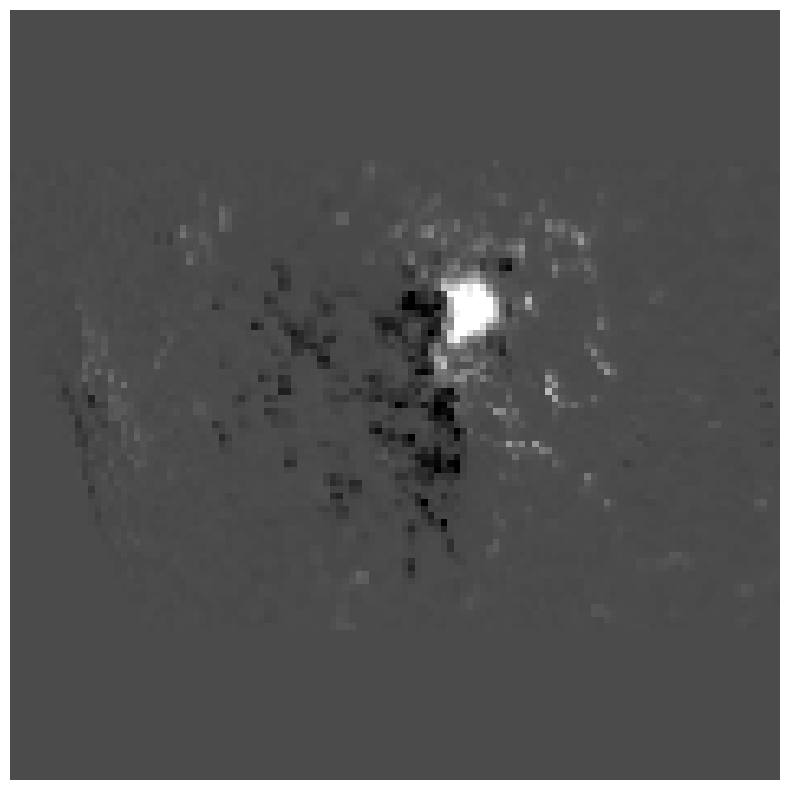

In [17]:
# Make figure same aspect ratio as image
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

# Remove axes
ax.set_axis_off()

# Plot first image

im = ax.imshow(images[0], norm=norm, cmap='gray', origin="lower")

In [16]:
def animate(i):
    im.set_data(images[i])
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)

ani = FuncAnimation(fig, animate, frames=arr.shape[0], interval=100, blit=False)

# Save animation with no padding

ani.save('harps_pres.mp4', dpi=200, fps=20)